<a href="https://colab.research.google.com/github/nadya-az/artificial_neural_networks/blob/main/%D0%9F%D1%80%D0%B0%D0%BA%D1%82%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%B0%D1%8F_%D1%80%D0%B0%D0%B1%D0%BE%D1%82%D0%B0_%E2%84%963.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Задание №1. Использование глубокой сверточной нейронной сети для классификации предметов одежды на примере датасета Fashion MNIST

In [1]:
from keras.datasets import fashion_mnist # импорт исходного датасета
from keras.models import Sequential


from tensorflow import keras
from tensorflow.keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPooling2D, AveragePooling2D 
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten



 
from keras.optimizers import Adam, SGD
import matplotlib.pyplot as plt
import numpy as np

In [2]:
(trainX, trainy), (testX, testy) = fashion_mnist.load_data()


trainX = trainX / 255
testX = testX / 255
 
trainy = keras.utils.to_categorical(trainy, 10)
testy = keras.utils.to_categorical(testy, 10)

trainX = np.expand_dims(trainX, axis=3)
testX = np.expand_dims(testX, axis=3)

print('Train: X = ', trainX.shape)
print('Test: X = ', testX.shape)

4422102/4422102 [==============================] - 0s 0us/step
Train: X =  (60000, 28, 28, 1)
Test: X =  (10000, 28, 28, 1)


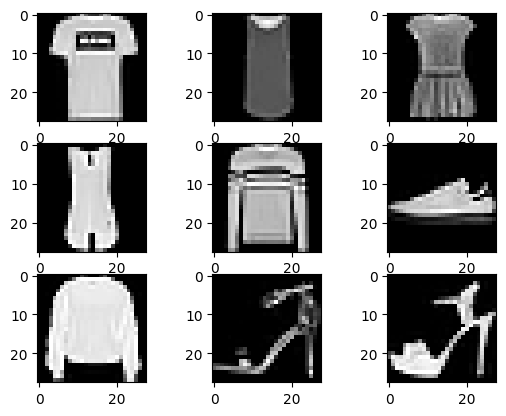

In [3]:
for i in range(1, 10):
    plt.subplot(3, 3, i)
    plt.imshow(trainX[i], cmap=plt.get_cmap('gray'))
 
plt.show()

In [4]:
model = keras.Sequential([
    Conv2D(6, (5,5), strides=(1,1), activation='tanh', input_shape=(28,28,1)),
    AveragePooling2D(pool_size=(2,2), strides=(2,2)),
    Conv2D(16, (5,5), strides=(1,1), activation='tanh'),
    AveragePooling2D(pool_size=(2,2), strides=(2,2)),

    Flatten(),

    Dense(units=120,activation='tanh'),
    Dense(units=84,activation='tanh'),
    Dense(units=10,activation='softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 6)         156       
                                                                 
 average_pooling2d (AverageP  (None, 12, 12, 6)        0         
 ooling2D)                                                       
                                                                 
 conv2d_1 (Conv2D)           (None, 8, 8, 16)          2416      
                                                                 
 average_pooling2d_1 (Averag  (None, 4, 4, 16)         0         
 ePooling2D)                                                     
                                                                 
 flatten (Flatten)           (None, 256)               0         
                                                                 
 dense (Dense)               (None, 120)               3

In [5]:
model.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])



In [6]:
EPOCH = 5

In [7]:
h = model.fit(trainX, trainy, batch_size=28, epochs=EPOCH, validation_split=0.2)

Epoch 1/5
1715/1715 [==============================] - 46s 26ms/step - loss: 0.5747 - accuracy: 0.7874 - val_loss: 0.4743 - val_accuracy: 0.8228
Epoch 2/5
1715/1715 [==============================] - 29s 17ms/step - loss: 0.4139 - accuracy: 0.8487 - val_loss: 0.3910 - val_accuracy: 0.8572
Epoch 3/5
1715/1715 [==============================] - 29s 17ms/step - loss: 0.3670 - accuracy: 0.8642 - val_loss: 0.3854 - val_accuracy: 0.8563
Epoch 4/5
1715/1715 [==============================] - 29s 17ms/step - loss: 0.3371 - accuracy: 0.8745 - val_loss: 0.3421 - val_accuracy: 0.8732
Epoch 5/5
1715/1715 [==============================] - 29s 17ms/step - loss: 0.3138 - accuracy: 0.8834 - val_loss: 0.3473 - val_accuracy: 0.8769


In [ ]:
model.evaluate(testX, testy)

313/313 [==============================] - 2s 7ms/step - loss: 0.3657 - accuracy: 0.8654


[0.365741491317749, 0.8654000163078308]

1.6 Анализируем обученную модель. Строим график (графики) обучения

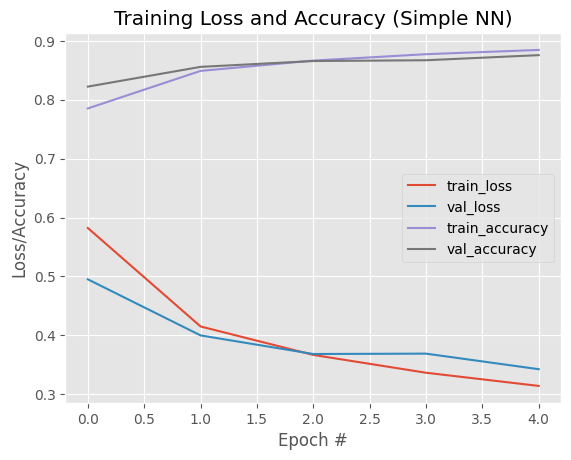

In [ ]:
N = np.arange(0, EPOCH)
plt.style.use("ggplot")
plt.figure()
plt.plot(N, h.history["loss"], label="train_loss")
plt.plot(N, h.history["val_loss"], label="val_loss")
plt.plot(N, h.history["accuracy"], label="train_accuracy")
plt.plot(N, h.history["val_accuracy"], label="val_accuracy")
plt.title("Training Loss and Accuracy (Simple NN)")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()

1.7. Загружаем свои изображения. С помощью функции predict() получаем предсказание нейронной сети

In [ ]:
import cv2
from google.colab.patches import cv2_imshow

# Добавляем интерфейс для загрузки изображений напрямую из блокнота
from google.colab import files
uploaded = files.upload() 

# загружаем входное изображение, меняем его размер на необходимый и выводим его

image = cv2.imread(list(uploaded.keys())[0], cv2.IMREAD_GRAYSCALE) # Преобразование изображения в оттенки серого при считывании
image = cv2.resize(image, (28, 28)) # Изменение разрешения изображения
image = cv2.bitwise_not(image) # Инверсия цветов (если в оригинале цифра написана черным цветом на белом фоне)
orig = image
image = image.reshape(-1, 28, 28, 1) # Приводим изображение из вида (28,28) в вид (1, 28, 28, 1)

cv2_imshow(orig)

Saving 6216631104.jpg to 6216631104.jpg


In [ ]:
preds = model.predict(image)
print(preds)

1/1 [==============================] - 0s 176ms/step
[[2.3475055e-05 9.9971145e-01 2.0708841e-05 1.7218333e-04 6.6942157e-05
  1.6910695e-08 3.8063693e-06 4.2749394e-07 6.5839043e-07 4.6652247e-07]]


In [ ]:
classes = ['T-shirt', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

i = preds.argmax(axis=1)[0]
print(f"Загружен тип одежды: {i}")


Загружен тип одежды: 1


Задание №2. Использование глубокой сверточной нейронной сети для классификации изображений по своему датасету

Используя датасет, собранный для предыдущей работы, разработайте и обучите свою модель глубокой сверточной нейронной сети для классификации изображений

In [ ]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from keras.models import Sequential
from keras.layers.core import Dense
from keras.optimizers import SGD
from imutils import paths
import matplotlib.pyplot as plt
import numpy as np
import random
import pickle
import cv2
from google.colab.patches import cv2_imshow
import os

from keras.models import Sequential


from tensorflow import keras
from tensorflow.keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPooling2D, AveragePooling2D 
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten



 
from keras.optimizers import Adam, SGD
import matplotlib.pyplot as plt
import numpy as np

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
print("[INFO] loading images...")
data = []
labels = []

[INFO] loading images...


In [ ]:
imagePaths = sorted(list(paths.list_images("/content/drive/MyDrive/flower_photos")))

random.shuffle(imagePaths)

In [ ]:
for imagePath in imagePaths:
	
	image = cv2.imread(imagePath) # загружаем изображение
	image = cv2.resize(image, (32, 32)) # меняем его разрешение на 32x32 пикселей (без учета соотношения сторон),
																								# сглаживаем его в 32x32x3=3072 пикселей
	data.append(image) # добавляем в список

	label = imagePath.split(os.path.sep)[-2] 	# извлекаем метку класса из пути к изображению (метка класса зависит от имени папки)
	labels.append(label) # 

In [ ]:
data = np.array(data, dtype="float") / 255.0
labels = np.array(labels)

In [ ]:
(trainX, testX, trainY, testY)= train_test_split(data, labels, test_size=0.25, random_state=42)

trainX = trainX / 255
testX = testX / 255
 

# trainX = np.expand_dims(trainX, axis=3)
# testX = np.expand_dims(testX, axis=3)

print('Train: X = ', trainX.shape)
print('Test: X = ', testX.shape)

Train: X =  (2272, 32, 32, 3)
Test: X =  (758, 32, 32, 3)


In [ ]:
lb = LabelBinarizer()
trainY = lb.fit_transform(trainY)
testY = lb.transform(testY)

In [ ]:
model_old = keras.Sequential([
    Conv2D(6, (5,5), strides=(1,1), activation='relu', input_shape=(32,32,3)), 
    
    AveragePooling2D(pool_size=(2,2), strides=(2,2)),
    Conv2D(16, (5,5), strides=(1,1), activation='relu'),
    AveragePooling2D(pool_size=(2,2), strides=(2,2)),

    Flatten(),

    Dense(units=120,activation='relu'),
    Dense(units=84,activation='relu'),
    Dense(units=5,activation='softmax') 
])

model_old.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 6)         456       
                                                                 
 average_pooling2d (AverageP  (None, 14, 14, 6)        0         
 ooling2D)                                                       
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 16)        2416      
                                                                 
 average_pooling2d_1 (Averag  (None, 5, 5, 16)         0         
 ePooling2D)                                                     
                                                                 
 flatten (Flatten)           (None, 400)               0         
                                                                 
 dense (Dense)               (None, 120)               4

In [ ]:
model_old.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [ ]:
his = model_old.fit(trainX, trainY, batch_size=100, epochs=1000, validation_split=0.2)

Epoch 1/1000
19/19 [==============================] - 2s 120ms/step - loss: 1.1435 - accuracy: 0.5190 - val_loss: 1.2352 - val_accuracy: 0.4637
Epoch 2/1000
19/19 [==============================] - 2s 112ms/step - loss: 1.1399 - accuracy: 0.5305 - val_loss: 1.2597 - val_accuracy: 0.4352
Epoch 3/1000
19/19 [==============================] - 1s 77ms/step - loss: 1.1325 - accuracy: 0.5272 - val_loss: 1.2365 - val_accuracy: 0.4527
Epoch 4/1000
19/19 [==============================] - 1s 68ms/step - loss: 1.1330 - accuracy: 0.5261 - val_loss: 1.2625 - val_accuracy: 0.4286
Epoch 5/1000
19/19 [==============================] - 1s 69ms/step - loss: 1.1293 - accuracy: 0.5294 - val_loss: 1.2460 - val_accuracy: 0.4527
Epoch 6/1000
19/19 [==============================] - 1s 69ms/step - loss: 1.1305 - accuracy: 0.5272 - val_loss: 1.2423 - val_accuracy: 0.4549
Epoch 7/1000
19/19 [==============================] - 1s 69ms/step - loss: 1.1285 - accuracy: 0.5250 - val_loss: 1.2402 - val_accuracy: 0.45

KeyboardInterrupt: ignored